<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: **MohammadAli MohammadKhani** <br>
   **Student ID**: **98102251**<br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)
# print(faces.target)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

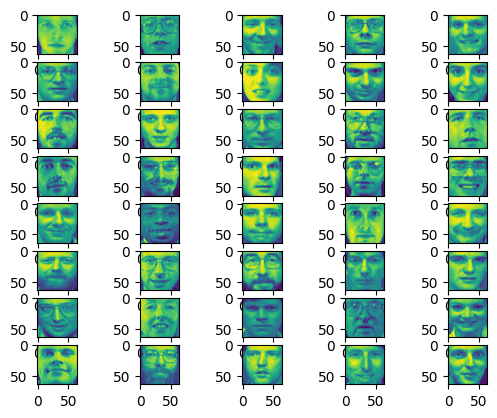

In [2]:
#TODO
images_to_show = []
label = 0
for i in range(400):
    if faces.target[i] == label:
        images_to_show.append(faces.images[i])
        label += 1

figure, axis = plt.subplots(8, 5)

counter = 0
for i in range(8):
    for j in range(5):
        axis[i, j].imshow(images_to_show[counter])
        counter += 1


<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(280, 4096)
(120, 4096)


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [4]:
from sklearn.decomposition import PCA
### Why 150? It is a ratio of variance of about 98 percent. It means we have 150 components and it is enough to reach 98 percent of variance ratio,
### So, it is sufficient.
pca = PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

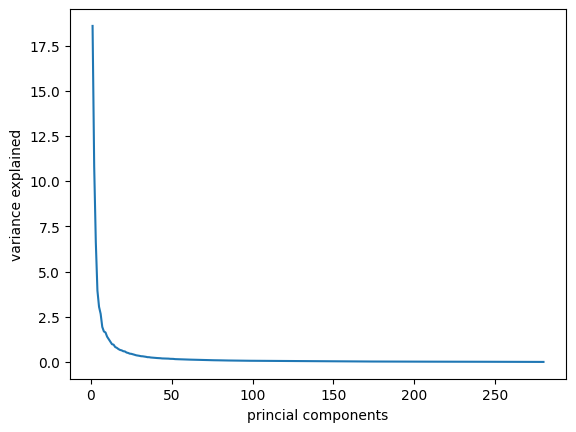

In [42]:
sample_PCA = PCA() 
sample_PCA.fit(X_train) ### Fitting the PCA to all of the data, including all of its features.
num_of_all_components = sample_PCA.n_components_
eigen_values = np.linalg.eigvals(X_train[0].reshape(64, 64))

princial_components = np.arange(1, num_of_all_components + 1)

plt.plot(princial_components, sample_PCA.explained_variance_)
plt.xlabel('princial components')
plt.ylabel('variance explained')
plt.show()   ### Plotting the principal components Vs variance explained, as the problem wanted.

### But overall, as we pick more components, we get higher variance ratio, which is better as we preserve more portions of our data.


<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

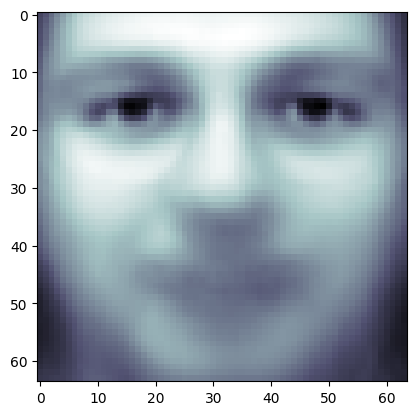

In [28]:

plt.imshow(pca.mean_.reshape(faces.images[100].shape),
           cmap=plt.cm.bone)

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

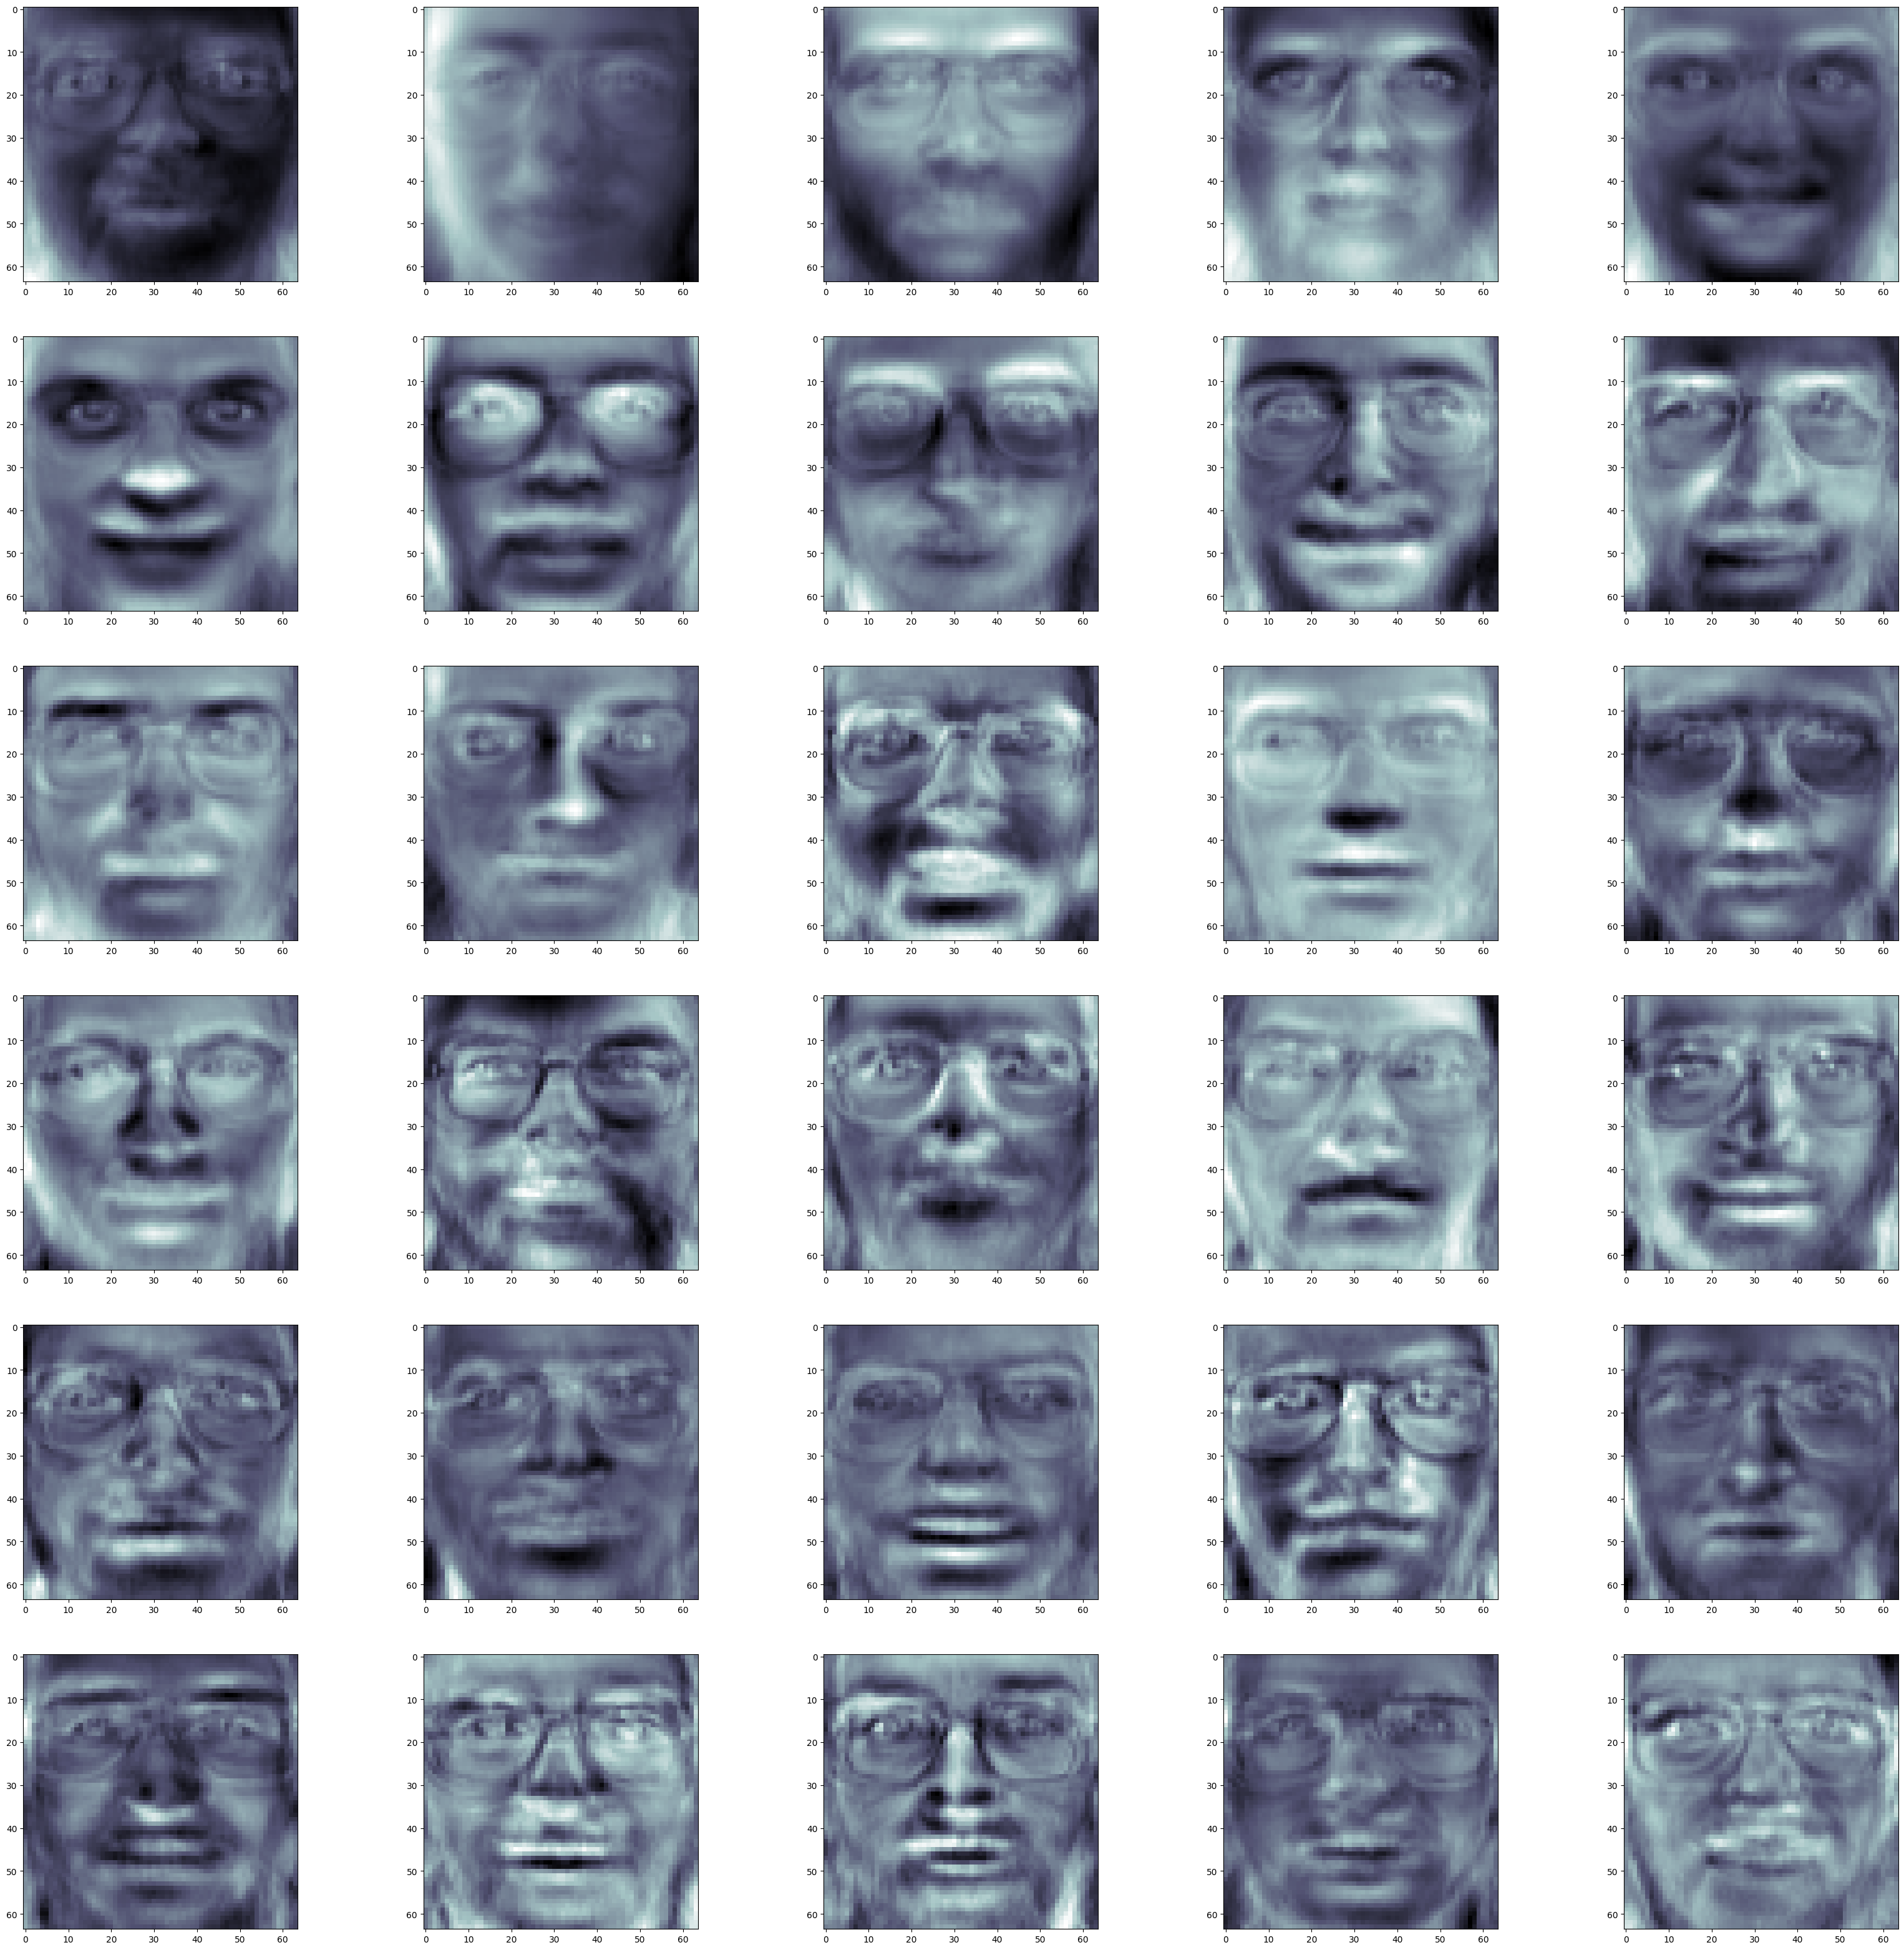

In [43]:
plt.figure(figsize=(40, 40)) 
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(faces.images[100].shape), cmap=plt.cm.bone)  ##plotting them by their rank 

### They act like a basis for building new faces (like in linear algebra when we had basis set of vectors).
### So, every face among our 400 faces, can be rebuilt with thes eigenfaces.

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [44]:
transformed_train_X = pca.transform(X_train)
transformed_test_X = pca.transform(X_test)

<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [109]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

C_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]
degree_values = [3, 4]
kernel_methods = ['linear', 'poly', 'rbf']
gamma_values = ['scale', 1, 0.1, 0.01, 0.01]

param_grid = {
    'C': C_values,
    'kernel': kernel_methods,
    'gamma': gamma_values,
    'degree': degree_values 
}

find_best_model = 'GridSearch'
if find_best_model == 'GridSearch':
    estimator = GridSearchCV(svm.SVC(), param_grid=param_grid, refit=True)
    estimator.fit(transformed_train_X, y_train)
    clf = estimator.best_estimator_
    print(f'best estimator is : {estimator.best_estimator_}')
    
### If we use the GridSearch, we can easilt get the best model. (With helps of this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html )
### But we can do it by hand too, which is a bit harder ad is shown below.
elif find_best_model == 'by-hand':
    for degree_value in degree_values:
        for method in kernel_methods:
            for gamma_val in gamma_values:
                for C_val in C_values:
                    clf = svm.SVC(kernel=method, C=C_val, degree=degree_value, gamma=gamma_val)
                    clf.fit(X_train, y_train)




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


best estimator is : SVC(C=0.1, kernel='linear')


<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

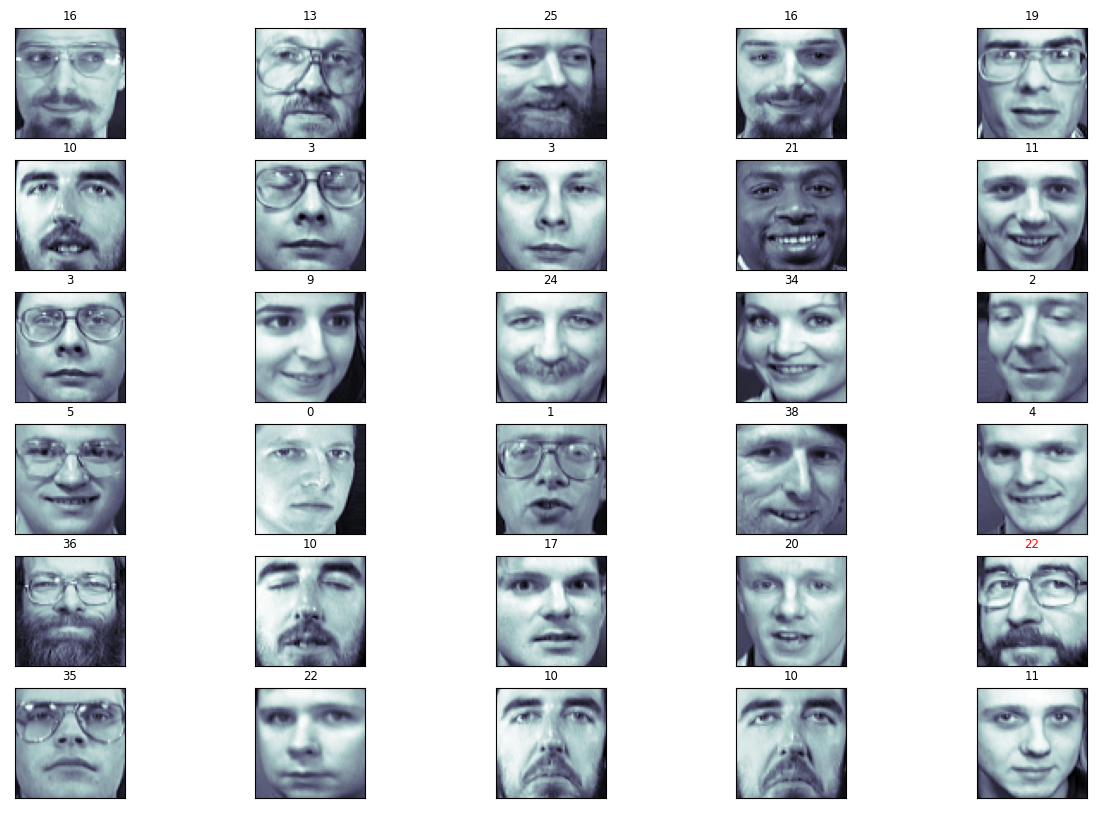

In [110]:
fig = plt.figure(figsize=(15, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(transformed_test_X[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Text(0, 0.5, 'recall')

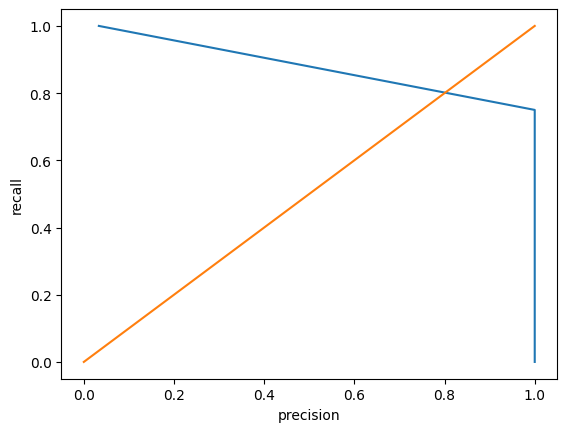

In [130]:
import pandas as pd
from sklearn.metrics import precision_recall_curve


y_pred = clf.predict(transformed_test_X)
# info = metrics.classification_report(y_test, y_pred, output_dict=True)
# data = pd.DataFrame(info)
# precisions = data.iloc[0, 0:40].to_frame()['precision']
# recalls = data.iloc[1, 0:40].to_frame()['recall']  ### Extracting precision and recall out of our report

# ### Using this documentation: http://scikit-learn.org/stable/modules/model_evaluation.html

precision = dict()
recall = dict()


for i in range(40):
    precision[i], recall[i], threshold = precision_recall_curve(y_test==i, y_pred==i)



plt.plot(precision[4], recall[4]) ### For label 4. Can be drawn for any label
plt.plot([0, 0.5, 1],[0, 0.5, 1])
plt.xlabel("precision")
plt.ylabel("recall")



### As it is obvious, mostly precision and recall are valued as 1, which is normal. There are some impurities as shown in the figure which neighter of them are 1.

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = Not necessary

recall at the above threshold = As shown above, it is about 0.8 but it is for just 1 label. if we get average on all labels, we will get more than that.

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [118]:
from sklearn.ensemble import RandomForestClassifier
new_classifier = RandomForestClassifier(n_estimators=30)

new_classifier.fit(transformed_train_X, y_train)   #### Training on random forest

RandomForestClassifier(n_estimators=30)

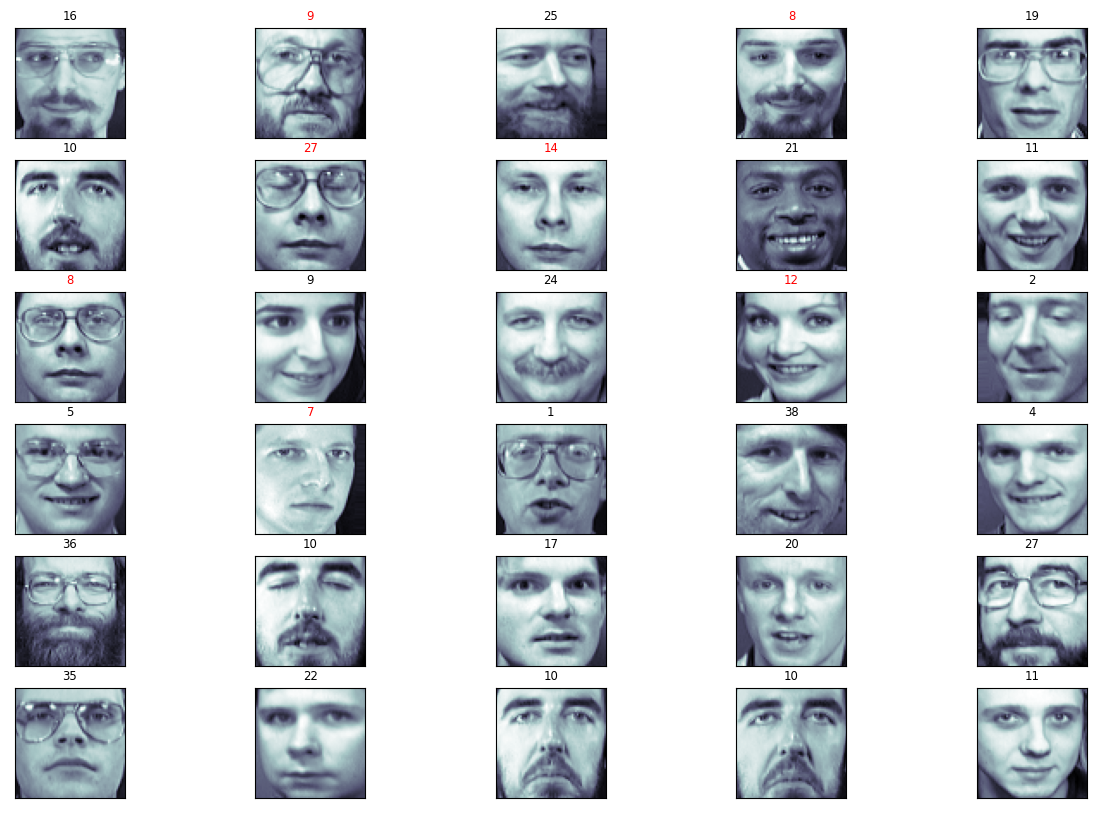

In [119]:
fig = plt.figure(figsize=(15, 10))
predictions = []
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    rfc_pred = new_classifier.predict(transformed_test_X[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if rfc_pred == y_test[i] else 'red')
    ax.set_title(rfc_pred, fontsize='small', color=color)
    predictions.append(rfc_pred)

0.9957264957264957
1.0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


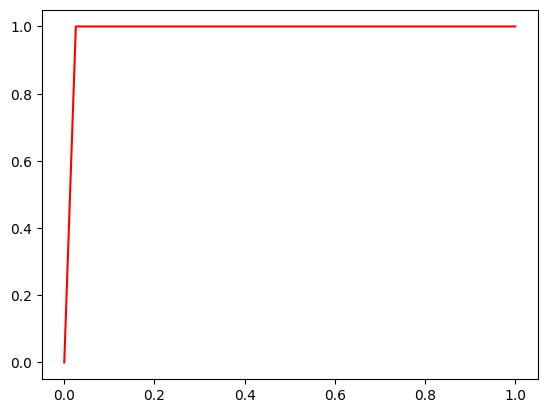

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

scores = [-1 for x in range(40)]
for index in range(len(scores)):
    counter = 0
    for pred in predictions:
        if pred == index:
            counter += 1
    scores[index] = counter

probablity_scores = []
for item in scores:
    item /= 30
    probablity_scores.append(item)

predictions = new_classifier.predict(transformed_test_X)


fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(30):
    fpr[i], tpr[i], threshold = roc_curve(y_test==i, predictions==i)
    roc_auc[i] = auc(fpr[i], tpr[i])



svm_roc_auc_score = roc_auc_score(y_test==i, y_pred==i)
# print(predictions)
rfc_roc_auc_score = roc_auc_score(y_test==i, predictions==i)
print(rfc_roc_auc_score)
print(svm_roc_auc_score)


plt.plot(fpr[1], tpr[1], color='red')   ## Plotted for label 1. Can be drawn for any label

### As we can see, the score on SVM is better.


<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [122]:
from sklearn.metrics import classification_report

info = classification_report(y_test, y_pred, output_dict=True)
data = pd.DataFrame(info)

data


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,accuracy,macro avg,weighted avg
precision,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0,...,1.0,0.666667,1.0,1.0,1.0,0.800000,1.0,0.941667,0.951282,0.961667
recall,0.750000,1.0,0.666667,1.0,0.750000,1.0,0.833333,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,0.941667,0.952991,0.941667
f1-score,0.857143,1.0,0.800000,1.0,0.857143,1.0,0.909091,1.0,1.0,1.0,...,1.0,0.800000,1.0,1.0,1.0,0.888889,1.0,0.941667,0.943131,0.943444
support,4.000000,3.0,3.000000,5.0,4.000000,4.0,6.000000,2.0,2.0,2.0,...,2.0,2.000000,2.0,1.0,2.0,4.000000,6.0,0.941667,120.000000,120.000000


<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [123]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, clf.predict(transformed_test_X))
conf_mx

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 6]])

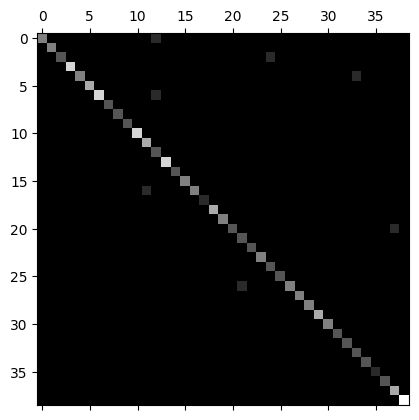

In [125]:

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [126]:
# TODO: calculate norm_conf_mx then print it
norm_conf_mx = conf_mx / conf_mx.sum(axis=0)
print(norm_conf_mx)

[[1.  0.  0.  ... 0.  0.  0. ]
 [0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  0.8 0. ]
 [0.  0.  0.  ... 0.  0.  1. ]]


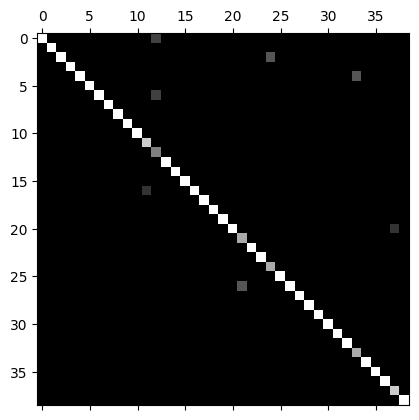

In [127]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()